<a href="https://colab.research.google.com/github/DinieHazim/big_data/blob/main/SMOL__Assignment_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USA House Listing

This dataset is about the house listing in United States of America. We found the dataset from Kaggle. The data were analysed using Python programming language with the help from other libraries such as mathplotlib, seaborn, pandas, geopandas and folium.

## Downloading the Dataset

1. Open www.kaggle.com/datasets
2. Go to filters and filter .CSV file type.
3. Search for Malaysia Election dataset.
4. Click on Malaysia GE14 Election Results and click Download at the top right.

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
!pip install kaggle
!pip install matplotlib
!pip install geopandas
!pip install branca==0.3.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 18.7 MB/s 
     |████████████████████████████████| 7.8 MB 19.0 MB/s 
     |████████████████████████████████| 16.6 MB 153 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: branca
    Found existing installation: branca 0.6.0
    Uninstalling branca-0.6.0:
      Successfully uninstalled branca-0.6.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d austinreese/usa-housing-listings

 92% 97.0M/106M [00:01<00:00, 87.3MB/s]
100% 106M/106M [00:01<00:00, 88.3MB/s] 


In [ ]:
!unzip usa-housing-listings.zip

Archive:  usa-housing-listings.zip
  inflating: housing.csv             


The dataset has been downloaded and extracted.

## Importing Libraries and Reading Dataset

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

df = pd.read_csv("housing.csv")
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,7049053337,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
384973,7049052968,https://reno.craigslist.org/apa/d/sparks-over-...,reno / tahoe,https://reno.craigslist.org,1549,apartment,1034,2,2.0,1,...,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00808_3EobCZHFEx...,AN OASIS OF YOUR OWN Introducing Lumina at Spa...,39.6269,-119.708,ca
384974,7049050454,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1249,apartment,840,2,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_kr3uKMhzrf...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5358,-119.746,ca
384975,7049050149,https://reno.craigslist.org/apa/d/sparks-ready...,reno / tahoe,https://reno.craigslist.org,1429,apartment,976,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00c0c_1GslcQnpLP...,Welcome Home We welcome you to The Villas at D...,39.5585,-119.703,ca


Next step

## Data Preparation and Cleaning

This section show the data cleaning process by removing the null values in the dataset, changing the datatype for the necessary data and changing the format for some values in the dataset.



In [ ]:
import random
import folium
import numpy as np
import geopandas as gpd
import seaborn as sn
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
n = sum(1 for line in open("housing.csv"))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pd.read_csv("housing.csv", skiprows=skip)
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049041451,https://reno.craigslist.org/apa/d/sparks-bouti...,reno / tahoe,https://reno.craigslist.org,1525,apartment,1053,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00W0W_aMt5LvqkQh...,"BRAND NEW APARTMENT HOMES, NOW OPEN! **GET 1 ...",39.6185,-119.672,ca
2,7049041434,https://reno.craigslist.org/apa/d/reno-6850-sh...,reno / tahoe,https://reno.craigslist.org,1295,condo,930,2,2.0,0,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01313_8AoC9NJZWA...,6850 Sharlands Ave E-1021 Reno NV 89523 ...,39.5193,-119.897,ca
3,7049016213,https://reno.craigslist.org/apa/d/carson-city-...,reno / tahoe,https://reno.craigslist.org,825,apartment,483,2,1.0,0,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00n0n_dBvipcBaKX...,"Chaparral Apartments Non-Smoking, Close to sh...",39.1711,-119.762,ca
4,7048984910,https://reno.craigslist.org/apa/d/reno-amazing...,reno / tahoe,https://reno.craigslist.org,1050,apartment,1074,2,1.5,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/01212_eO8mdiOEOC...,3970 Covington Way Reno NV 89503 Location: NW...,39.5623,-119.828,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,7049061482,https://reno.craigslist.org/apa/d/reno-move-in...,reno / tahoe,https://reno.craigslist.org,1215,apartment,850,2,1.0,1,...,0,0,0,laundry on site,carport,https://images.craigslist.org/00K0K_bBn9pBYk4T...,"Location: 3285 Clover Way - Reno, NV 89509 ...",39.4916,-119.810,ca
38494,7049047129,https://reno.craigslist.org/apa/d/reno-looking...,reno / tahoe,https://reno.craigslist.org,1433,apartment,1167,2,2.0,0,...,0,0,0,NaN,NaN,https://images.craigslist.org/00d0d_2YnYTp0jWi...,Seize your chance to live in one of the premie...,39.5446,-119.891,ca
38495,7033381147,https://reno.craigslist.org/apa/d/reno-locatio...,reno / tahoe,https://reno.craigslist.org,1250,apartment,960,2,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00B0B_3g3Ei4QcdL...,"2300 WEST APARTMENTS 2300 Harvard Way, Reno NV...",39.5013,-119.786,ca
38496,7049061733,https://reno.craigslist.org/apa/d/sparks-free-...,reno / tahoe,https://reno.craigslist.org,1049,apartment,640,1,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00g0g_febb30TN2B...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5473,-119.756,ca


In [ ]:
df['state'] = df['state'].str.upper()
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,CA
1,7049041451,https://reno.craigslist.org/apa/d/sparks-bouti...,reno / tahoe,https://reno.craigslist.org,1525,apartment,1053,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00W0W_aMt5LvqkQh...,"BRAND NEW APARTMENT HOMES, NOW OPEN! **GET 1 ...",39.6185,-119.672,CA
2,7049041434,https://reno.craigslist.org/apa/d/reno-6850-sh...,reno / tahoe,https://reno.craigslist.org,1295,condo,930,2,2.0,0,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01313_8AoC9NJZWA...,6850 Sharlands Ave E-1021 Reno NV 89523 ...,39.5193,-119.897,CA
3,7049016213,https://reno.craigslist.org/apa/d/carson-city-...,reno / tahoe,https://reno.craigslist.org,825,apartment,483,2,1.0,0,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00n0n_dBvipcBaKX...,"Chaparral Apartments Non-Smoking, Close to sh...",39.1711,-119.762,CA
4,7048984910,https://reno.craigslist.org/apa/d/reno-amazing...,reno / tahoe,https://reno.craigslist.org,1050,apartment,1074,2,1.5,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/01212_eO8mdiOEOC...,3970 Covington Way Reno NV 89503 Location: NW...,39.5623,-119.828,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,7049061482,https://reno.craigslist.org/apa/d/reno-move-in...,reno / tahoe,https://reno.craigslist.org,1215,apartment,850,2,1.0,1,...,0,0,0,laundry on site,carport,https://images.craigslist.org/00K0K_bBn9pBYk4T...,"Location: 3285 Clover Way - Reno, NV 89509 ...",39.4916,-119.810,CA
38494,7049047129,https://reno.craigslist.org/apa/d/reno-looking...,reno / tahoe,https://reno.craigslist.org,1433,apartment,1167,2,2.0,0,...,0,0,0,NaN,NaN,https://images.craigslist.org/00d0d_2YnYTp0jWi...,Seize your chance to live in one of the premie...,39.5446,-119.891,CA
38495,7033381147,https://reno.craigslist.org/apa/d/reno-locatio...,reno / tahoe,https://reno.craigslist.org,1250,apartment,960,2,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00B0B_3g3Ei4QcdL...,"2300 WEST APARTMENTS 2300 Harvard Way, Reno NV...",39.5013,-119.786,CA
38496,7049061733,https://reno.craigslist.org/apa/d/sparks-free-...,reno / tahoe,https://reno.craigslist.org,1049,apartment,640,1,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00g0g_febb30TN2B...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5473,-119.756,CA


In [ ]:
df["baths"] = df['baths'].astype('int')

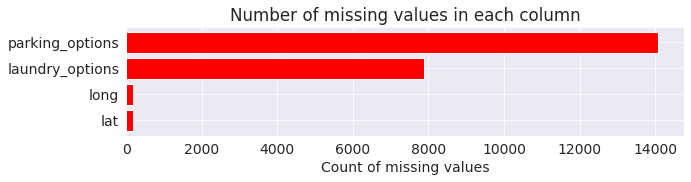

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(10,2))
rects = ax.barh(ind,missing_df.missing_count.values,color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

As shown in the bar graph above, there are some columns that have null values. So we have decided that for columns that are having null values over 1000 will be dropped as for columns with less than 1000 null values, only rows will be dropped.

In [ ]:
df.isna().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             7888
parking_options            14064
image_url                      0
description                    0
lat                          177
long                         177
state                          0
dtype: int64

In [ ]:
df = df.dropna()
df = df.drop(['parking_options', 'laundry_options'], axis=1)

In [ ]:
df.isna().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23638 entries, 0 to 38497
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       23638 non-null  int64  
 1   url                      23638 non-null  object 
 2   region                   23638 non-null  object 
 3   region_url               23638 non-null  object 
 4   price                    23638 non-null  int64  
 5   type                     23638 non-null  object 
 6   sqfeet                   23638 non-null  int64  
 7   beds                     23638 non-null  int64  
 8   baths                    23638 non-null  int64  
 9   cats_allowed             23638 non-null  int64  
 10  dogs_allowed             23638 non-null  int64  
 11  smoking_allowed          23638 non-null  int64  
 12  wheelchair_access        23638 non-null  int64  
 13  electric_vehicle_charge  23638 non-null  int64  
 14  comes_furnished       

In [ ]:
reducedDF = df[df.price <= 5000]
reducedDF = reducedDF[reducedDF.sqfeet <= 4000]
reducedDF = reducedDF[np.abs(reducedDF.beds-df.beds.mean()) <= (3 * reducedDF.beds.std())]
reducedDF = reducedDF[np.abs(reducedDF.baths-df.baths.mean()) <= (3 * reducedDF.baths.std())]

print(f"{df.shape[0] - reducedDF.shape[0]} rows removed")

298 rows removed


In [ ]:
reducedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 38497
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       23340 non-null  int64  
 1   url                      23340 non-null  object 
 2   region                   23340 non-null  object 
 3   region_url               23340 non-null  object 
 4   price                    23340 non-null  int64  
 5   type                     23340 non-null  object 
 6   sqfeet                   23340 non-null  int64  
 7   beds                     23340 non-null  int64  
 8   baths                    23340 non-null  int64  
 9   cats_allowed             23340 non-null  int64  
 10  dogs_allowed             23340 non-null  int64  
 11  smoking_allowed          23340 non-null  int64  
 12  wheelchair_access        23340 non-null  int64  
 13  electric_vehicle_charge  23340 non-null  int64  
 14  comes_furnished       

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [ ]:
Avg_price = df.groupby('state').apply(lambda x: x['price'].mean()).reset_index(name= "Average House Price by State")
pd.set_option('display.precision',2)
Avg_price

,state,Average House Price by State
0,AK,1210.13
1,AL,908.03
2,AR,926.84
3,AZ,1024.36
4,CA,2191.69
5,CO,1559.98
6,CT,1634.85
7,DC,2058.80
8,DE,1279.60
9,FL,1319.32


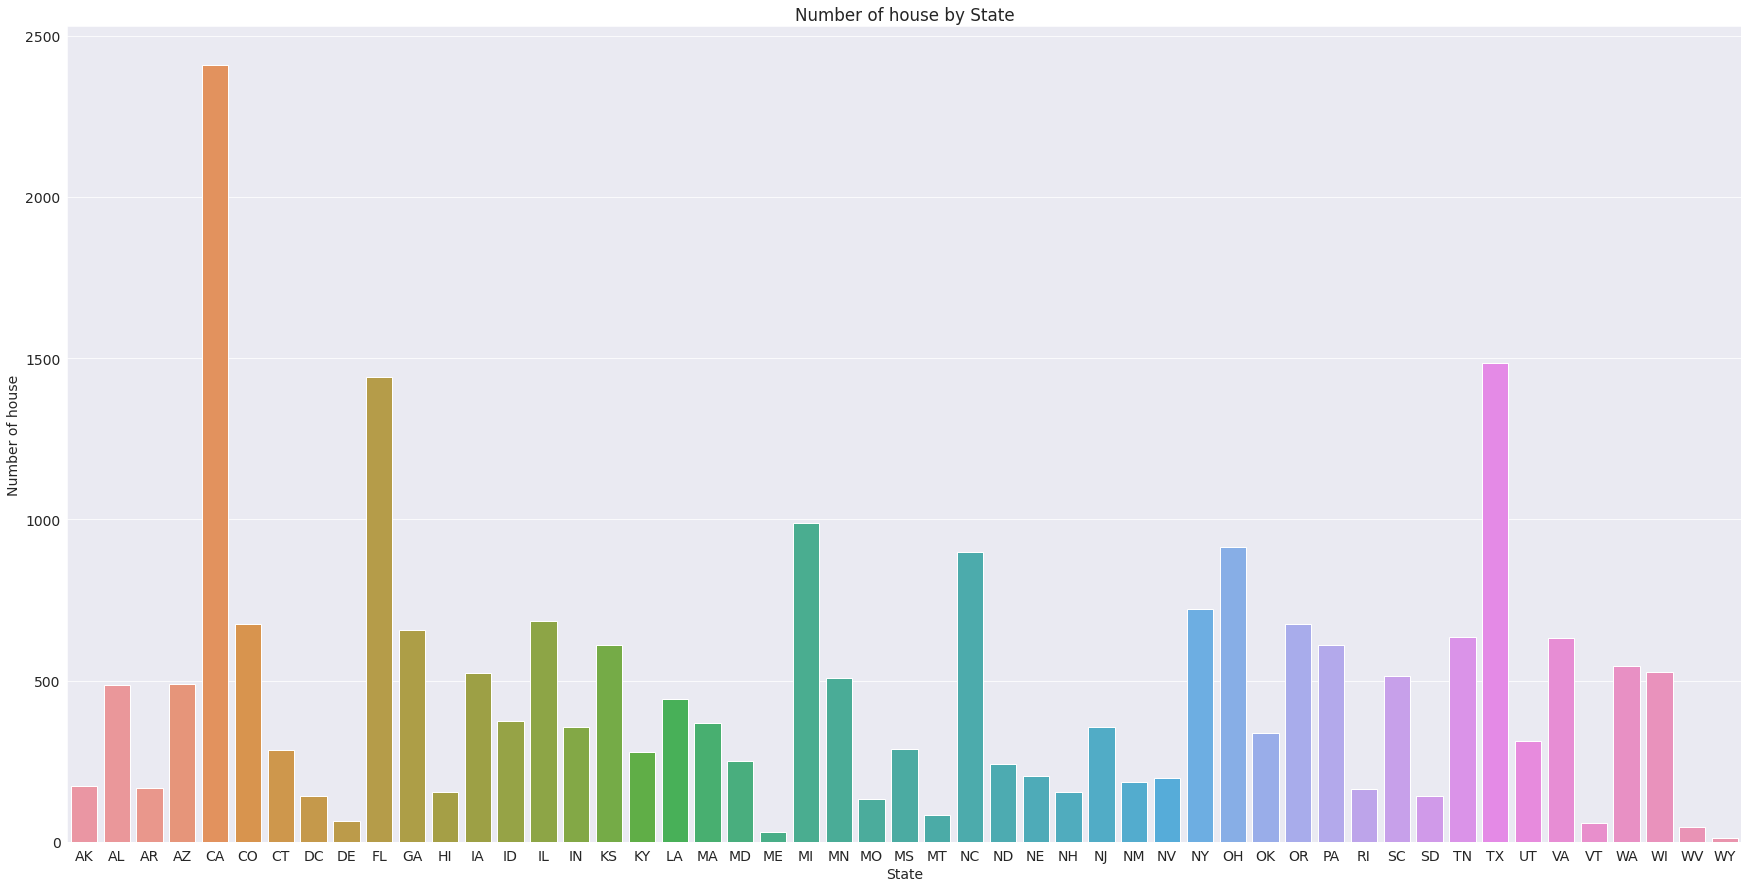

In [ ]:
# Another question
state = df.groupby('state').apply(lambda x: len(x['id'])).reset_index(name= "number house")
fig, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x=state['state'], y=state['number house'])
ax.set(xlabel ="State", ylabel = "Number of house", title ='Number of house by State')
plt.show()

The bar plot above proves that there are many house listing across the United States of America as California the highest number of house listing recorded and Wyoming as the least number of house listing recorded.

Text(0, 0.5, 'Probability Density')

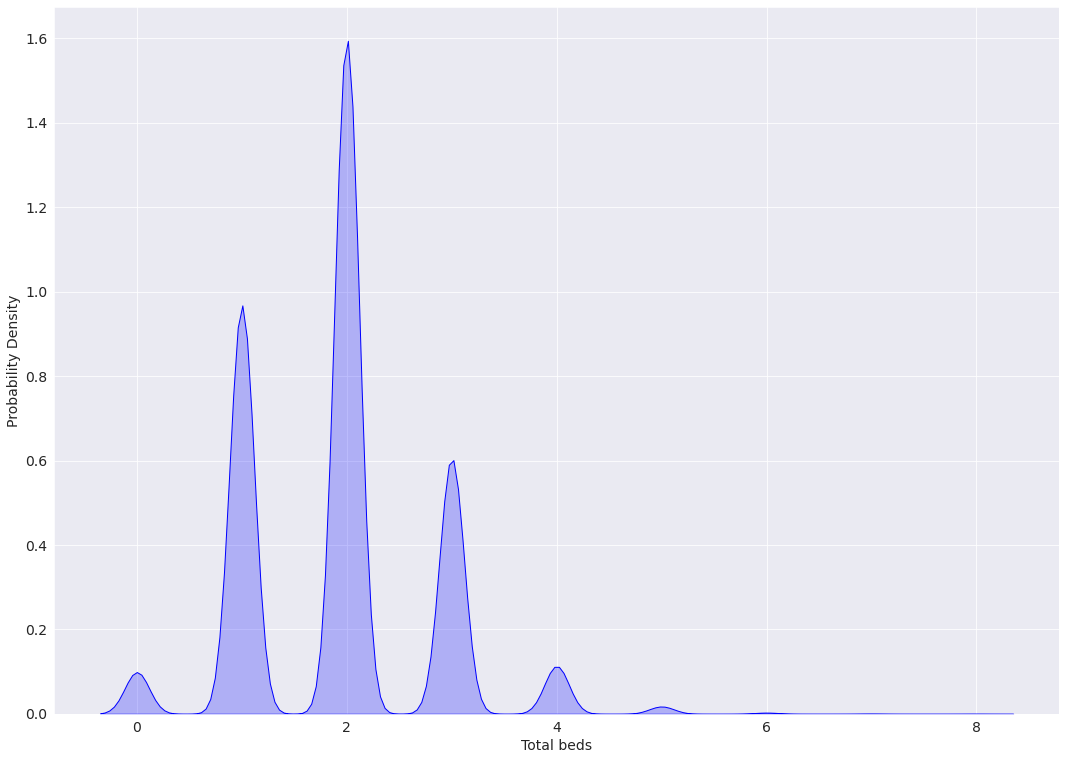

In [ ]:
fig, ax = plt.subplots(figsize=(18, 13))

sns.kdeplot(df['beds'],color='blue',shade=True, ax= ax)

# Setting the X and Y Label
plt.xlabel('Total beds')
plt.ylabel('Probability Density')

This KDE Plot shows that the average number of bedroom for houses in United States of America is 2 bedrooms.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23638 entries, 0 to 38497
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       23638 non-null  int64  
 1   url                      23638 non-null  object 
 2   region                   23638 non-null  object 
 3   region_url               23638 non-null  object 
 4   price                    23638 non-null  int64  
 5   type                     23638 non-null  object 
 6   sqfeet                   23638 non-null  int64  
 7   beds                     23638 non-null  int64  
 8   baths                    23638 non-null  int64  
 9   cats_allowed             23638 non-null  int64  
 10  dogs_allowed             23638 non-null  int64  
 11  smoking_allowed          23638 non-null  int64  
 12  wheelchair_access        23638 non-null  int64  
 13  electric_vehicle_charge  23638 non-null  int64  
 14  comes_furnished       

In [ ]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.36e+04,23638.00,2.36e+04,23638.00,23638.00,23638.00,23638.00,23638.00,23638.0,23638.00,23638.00,23638.00,23638.00
mean,7.04e+09,1374.58,1.37e+03,1.92,1.42,0.78,0.75,0.64,0.1,0.02,0.06,37.94,-94.28
std,8.86e+06,9125.21,5.46e+04,0.88,0.56,0.41,0.43,0.48,0.3,0.13,0.23,5.62,17.04
min,7.00e+09,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.93,-159.36
25%,7.04e+09,820.00,7.50e+02,1.00,1.00,1.00,0.00,0.00,0.0,0.00,0.00,33.98,-105.09
50%,7.04e+09,1065.00,9.50e+02,2.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,38.64,-89.39
75%,7.05e+09,1451.75,1.16e+03,2.00,2.00,1.00,1.00,1.00,0.0,0.00,0.00,41.76,-81.57
max,7.05e+09,704873.00,8.39e+06,8.00,6.00,1.00,1.00,1.00,1.0,1.00,1.00,64.99,94.12


## Asking and Answering Questions


The questions were asked to make the elaboration of the dataset is easier to understand and comprehend. The visualization helped by answering the questions:


#### Q1: Which part of the country has the most list of house?

---



In [ ]:
# Create a base map
m_5 = folium.Map(location=[41, -96], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=df[['lat', 'long']], radius=10).add_to(m_5)

# Display the map
m_5

All of houses that are in the listing are scattered all around the United States of America as shown in the heatmap above. Most of the houses are located in the eastern part of USA. There are also fairly number of houses located in Washington which are located in the western region of USA.

In [ ]:
df.groupby('state')["id"].count().sort_values()

state
WY      11
ME      30
WV      46
VT      58
DE      65
MT      82
MO     133
SD     143
DC     143
NH     154
HI     156
RI     165
AR     168
AK     172
NM     184
NV     197
NE     205
ND     240
MD     251
KY     279
CT     284
MS     289
UT     314
OK     336
IN     355
NJ     356
MA     367
ID     376
LA     442
AL     486
AZ     491
MN     509
SC     514
IA     524
WI     528
WA     545
KS     609
PA     611
VA     632
TN     635
GA     658
OR     675
CO     676
IL     685
NY     721
NC     898
OH     916
MI     990
FL    1441
TX    1484
CA    2409
Name: id, dtype: int64

#### Q2: Which type of house has the most distribution?

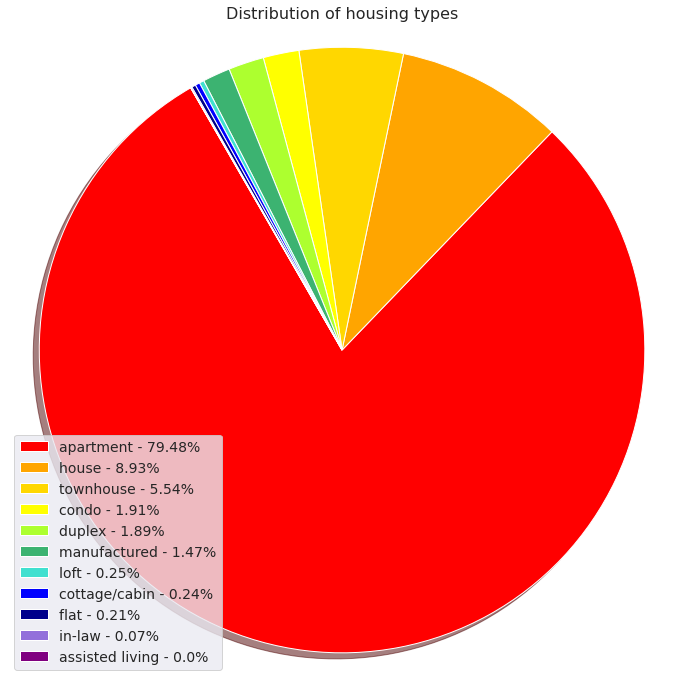

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 12)
baseColors = ["red", "orange", "gold", "yellow", "greenyellow", "mediumseagreen", "turquoise", "blue", "darkblue", "mediumpurple", "purple", "crimson"]
types = dict(reducedDF.type.value_counts())
labels = []
sizes = []
colors = []
count = 0
for k, v in types.items():
    labels.append(f"{k} - {round(((v / reducedDF.shape[0]) * 100), 2)}%")
    sizes.append(v)
    colors.append(baseColors[count])
    count += 1

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=120)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title("Distribution of housing types", fontsize = 16)
plt.show()

Looking at the pie chart above, majority of the houses listing in United States of America are apartment. Followed by terrace house, townhouse, condo, duplex, manufactured houses, loft house, cottage, flat, in-law house and assisted living respectively.

In [ ]:
df.groupby('type')["id"].count().sort_values()

type
assisted living        1
in-law                16
flat                  49
cottage/cabin         58
loft                  60
manufactured         350
duplex               449
condo                450
townhouse           1304
house               2239
apartment          18662
Name: id, dtype: int64

#### Q3: What are the relation between square feet and price?

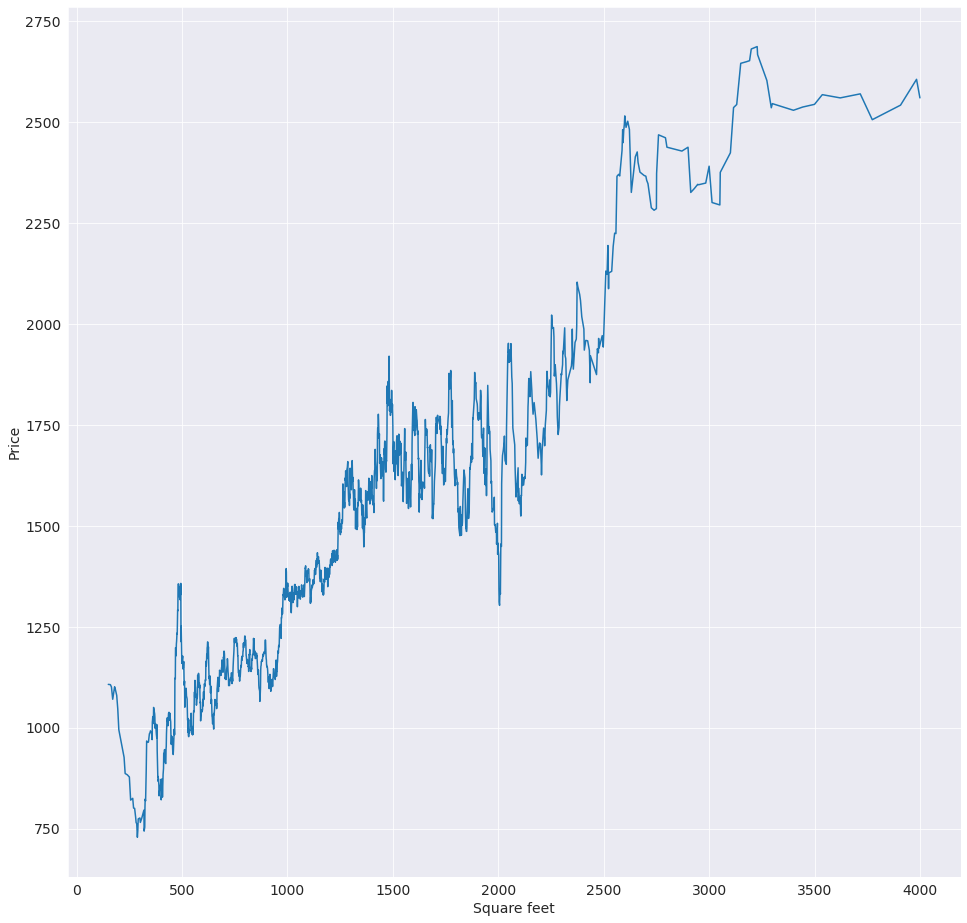

In [ ]:
fig, ax = plt.subplots(figsize = (16, 16))
grouped = reducedDF.groupby("sqfeet")["price"].mean()
rollingGrouped = grouped.rolling(25).mean()
sqfeetData = rollingGrouped.index.values
priceData = rollingGrouped.values
ax.set_xlabel("Square feet", fontsize = 14)
ax.set_ylabel("Price", fontsize = 14)
ax.plot(sqfeetData, priceData)

As shown in the graph above that the bigger the number of square feet per house, the higher the rent of the houses per month. There are also some cases that a house might have a cheap rent price with bigger square feet.

#### Q4: Does the number of bedroom affect the number of bathroom?

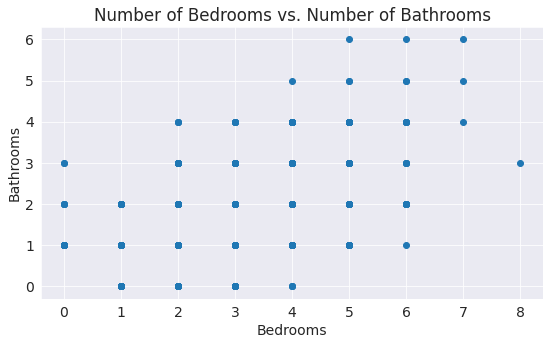

In [ ]:
bedrooms = df['beds']
bathrooms = df['baths']

# Create the scatter plot
plt.scatter(bedrooms, bathrooms)

# Add labels and title
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.title('Number of Bedrooms vs. Number of Bathrooms')

# Show the plot
plt.show()

The scatter plot above proves that the number of bedroom does not necessarily complementing the number bathrooms in a house.

#### Q5: Which region has the most house listing?

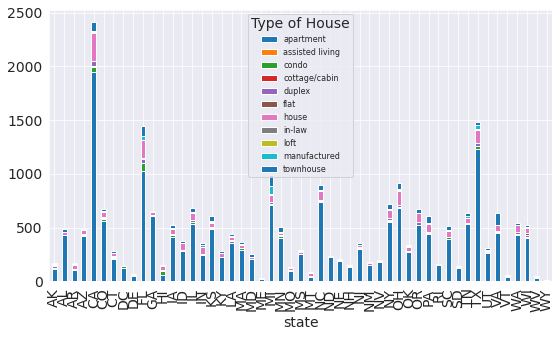

In [ ]:
df_grouped = df.groupby(['state', 'type']).size().reset_index(name='count')

# Create a pivot table with the data, with regions as the rows, types as the columns, and the count as the values
df_pivot = df_grouped.pivot(index='state', columns='type', values='count')

# Plot the pivot table as a stacked bar plot
df_pivot.plot(kind='bar', stacked=True)

# Add a legend and show the plot
plt.legend(loc='upper center', title='Type of House', fontsize=8)
plt.show()


When looking at the stacked bar plot above, it shows that California is the state in United States of America that have the most houses compared to other states.

In [ ]:
df.groupby(['state', 'type']).size().reset_index(name='count')

,state,type,count
0,AK,apartment,119
1,AK,condo,7
2,AK,duplex,15
3,AK,house,15
4,AK,in-law,1
...,...,...,...
348,WV,house,5
349,WV,manufactured,2
350,WV,townhouse,9
351,WY,apartment,8


## Inferences and Conclusion

Based on the information provided, it can be inferred that the majority of houses listed in the United States are located in the eastern part of the country, with a significant number also located in Washington. Most of these houses are apartments, followed by terrace houses and townhouses. The size of a house, as measured by its square footage, is generally correlated with its rent price, although there are some exceptions. The number of bedrooms in a house does not necessarily correspond with the number of bathrooms. Finally, California has the most houses listed of all the states in the United States.

## References and Future Work

There are several potential projects that could be undertaken using this dataset:

1. Analyzing the relationship between the location of a house and its rental price: This could involve mapping the locations of the houses in the dataset and comparing their rental prices to identify any patterns or trends. Resources that may be useful for this project include GIS software such as ArcGIS or QGIS, as well as data visualization tools such as Tableau or Excel.

2. Predicting rental prices based on various features of the houses: This project could involve using machine learning techniques to build a model that predicts the rental price of a house based on its size, number of bedrooms and bathrooms, and other features. Resources that may be useful for this project include online tutorials on machine learning, such as those available on Coursera or edX, as well as machine learning libraries such as scikit-learn or TensorFlow.

3. Identifying factors that influence the demand for rental properties: This project could involve analyzing the dataset to identify factors that influence the demand for rental properties, such as the location of the house, the size of the house, and the rent price. Resources that may be useful for this project include statistical analysis software such as R or SPSS, as well as data visualization tools such as Tableau or Excel.

4. Developing a recommendation system for rental properties: This project could involve building a recommendation system that suggests rental properties to users based on their preferences and past rental history. Resources that may be useful for this project include online tutorials on recommendation systems, such as those available on Coursera or edX, as well as machine learning libraries such as scikit-learn or TensorFlow.